# Sentiment Analysis of Budget-24 according to Website

Here we will analyse [livemint coverage](https://www.livemint.com/economy/budget-2024-25-key-highlights-live-updates-interim-budget-agriculture-infra-fiscal-deficit-nirmala-sitharaman-11706695416199.html) on Budget 24 using [lxyuan/distilbert-base-multilingual-cased-sentiments-student](https://huggingface.co/lxyuan/distilbert-base-multilingual-cased-sentiments-student) ML model from Hugging Face .

In [1]:
from transformers import pipeline

## Import  ML model

In [3]:
distilled_student_sentiment_classifier = pipeline(
    model="lxyuan/distilbert-base-multilingual-cased-sentiments-student", 
    return_all_scores=True
)

C:\Users\KIIT\anaconda3\Lib\site-packages\transformers\pipelines\text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar funcionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(

### Test the model

In [23]:
distilled_student_sentiment_classifier ("I like the movie.")[0]

[{'label': 'positive', 'score': 0.6547248363494873},
 {'label': 'neutral', 'score': 0.18753547966480255},
 {'label': 'negative', 'score': 0.15773969888687134}]

In [25]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.livemint.com/economy/budget-2024-25-key-highlights-live-updates-interim-budget-agriculture-infra-fiscal-deficit-nirmala-sitharaman-11706695416199.html'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
live_sec_intro = soup.find(class_='liveSecIntro')
web_text = None
if live_sec_intro:
    web_text = live_sec_intro.get_text().strip()

web_text


'Budget 2024 Key Highlights LIVE Updates: Union Finance Minister Nirmala Sitharaman presented her sixth Budget on February 1. This was an interim budget ahead of the general elections later this year. The Interim Budget 2024 was focused on youth and women empowerment, while maintaining fiscal consolidation and continuing capex. FM Sitharaman lowered down FY25 fiscal deficit target to 5.1% of the GDP. There were no changes made to the direct tax and indirect tax rates. Read the latest news on\xa0Budget 2024 with our live coverage on the\xa0Income Tax Slab,\xa0Impact on Share Market, Budget Key Highlights, Corporate Reactions, and\xa0Funny Memes.10 key takeaways from FM Sitharaman’s post-budget presser1] Finance Minister Nirmala Sitharaman stressed on 5 ‘Disha Nirdashak’ baatein: Social justice as an effective governance model; Focus on the poor, youth, women, and the Annadata (farmers); Focus on infrastructure; Use of technology to improve productivity and High power committee for chall

## Defining function to extract sentences

In [27]:
import re

def get_sentences(paragraph):
    sentences = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', paragraph)
    return sentences

In [28]:
sentences = get_sentences(web_text)
sentences

['Budget 2024 Key Highlights LIVE Updates: Union Finance Minister Nirmala Sitharaman presented her sixth Budget on February 1.',
 'This was an interim budget ahead of the general elections later this year.',
 'The Interim Budget 2024 was focused on youth and women empowerment, while maintaining fiscal consolidation and continuing capex.',
 'FM Sitharaman lowered down FY25 fiscal deficit target to 5.1% of the GDP.',
 'There were no changes made to the direct tax and indirect tax rates.',
 'Read the latest news on\xa0Budget 2024 with our live coverage on the\xa0Income Tax Slab,\xa0Impact on Share Market, Budget Key Highlights, Corporate Reactions, and\xa0Funny Memes.10 key takeaways from FM Sitharaman’s post-budget presser1] Finance Minister Nirmala Sitharaman stressed on 5 ‘Disha Nirdashak’ baatein: Social justice as an effective governance model; Focus on the poor, youth, women, and the Annadata (farmers); Focus on infrastructure; Use of technology to improve productivity and High powe

# Applying model to get the sentiment of each sentences

In [35]:
sentiment = distilled_student_sentiment_classifier(sentences)
sentiment

[[{'label': 'positive', 'score': 0.569232165813446},
  {'label': 'neutral', 'score': 0.20299331843852997},
  {'label': 'negative', 'score': 0.22777454555034637}],
 [{'label': 'positive', 'score': 0.4114557206630707},
  {'label': 'neutral', 'score': 0.2773597836494446},
  {'label': 'negative', 'score': 0.31118446588516235}],
 [{'label': 'positive', 'score': 0.6323974132537842},
  {'label': 'neutral', 'score': 0.16273921728134155},
  {'label': 'negative', 'score': 0.20486336946487427}],
 [{'label': 'positive', 'score': 0.4068266749382019},
  {'label': 'neutral', 'score': 0.17968685925006866},
  {'label': 'negative', 'score': 0.4134864807128906}],
 [{'label': 'positive', 'score': 0.19538149237632751},
  {'label': 'neutral', 'score': 0.7039102911949158},
  {'label': 'negative', 'score': 0.10070820152759552}],
 [{'label': 'positive', 'score': 0.589194118976593},
  {'label': 'neutral', 'score': 0.12298103421926498},
  {'label': 'negative', 'score': 0.287824809551239}],
 [{'label': 'positive'

## Storing the data in pandas

In [36]:
import pandas as pd

In [38]:
df = pd.DataFrame(columns=['Sentence', 'Positive Score', 'Neutral Score', 'Negative Score'])

for idx, sentence_result in enumerate(sentiment):
    positive_score = sentence_result[0]['score']
    neutral_score = sentence_result[1]['score']
    negative_score = sentence_result[2]['score']
    
    df.loc[idx] = [sentences[idx], positive_score, neutral_score, negative_score]

df

,Sentence,Positive Score,Neutral Score,Negative Score
0,Budget 2024 Key Highlights LIVE Updates: Union...,0.569232,0.202993,0.227775
1,This was an interim budget ahead of the genera...,0.411456,0.277360,0.311184
2,The Interim Budget 2024 was focused on youth a...,0.632397,0.162739,0.204863
3,FM Sitharaman lowered down FY25 fiscal deficit...,0.406827,0.179687,0.413486
4,There were no changes made to the direct tax a...,0.195381,0.703910,0.100708
5,Read the latest news on Budget 2024 with our l...,0.589194,0.122981,0.287825
6,We have delivered on Development and have bett...,0.738069,0.126887,0.135044
7,We are bringing down the fiscal deficit despit...,0.260500,0.215635,0.523864


### Getting the overall Sentiment

In [40]:
overall_positive = (df['Positive Score'] * df['Sentence'].apply(lambda x: len(x.split()))).sum() / df['Sentence'].apply(lambda x: len(x.split())).sum()
overall_neutral = (df['Neutral Score'] * df['Sentence'].apply(lambda x: len(x.split()))).sum() / df['Sentence'].apply(lambda x: len(x.split())).sum()
overall_negative = (df['Negative Score'] * df['Sentence'].apply(lambda x: len(x.split()))).sum() / df['Sentence'].apply(lambda x: len(x.split())).sum()

overall_positive , overall_neutral , overall_negative

(0.41685132877054537, 0.20085706779817966, 0.3822915863923051)

In [41]:
import matplotlib.pyplot as plt

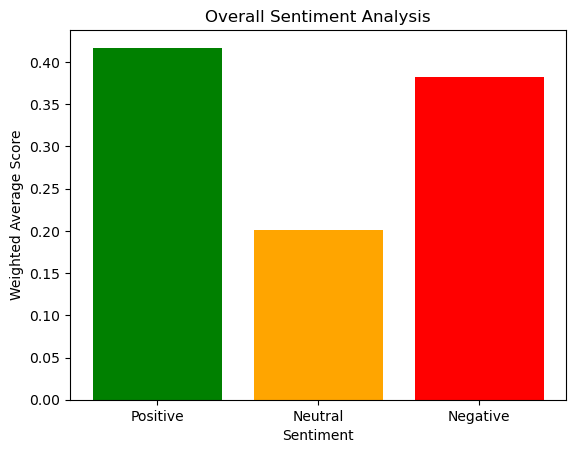

In [42]:
labels = ['Positive', 'Neutral', 'Negative']
scores = [overall_positive, overall_neutral, overall_negative]

plt.bar(labels, scores, color=['green', 'orange', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Weighted Average Score')
plt.title('Overall Sentiment Analysis')
plt.show()


# Conclusion of the study 
<br>
<hr>

Based on the sentiment analysis results, it can be concluded that the overall sentiment of the analyzed text leans slightly towards positive, with a weighted average score of approximately 0.417 for positive sentiment. Neutral sentiment also plays a significant role, with a weighted average score of around 0.201. However, negative sentiment is also notable, with a weighted average score of approximately 0.382.

Overall, while there is a predominant presence of positive sentiment in the text, it is important to acknowledge the existence of neutral and negative sentiments as well. This suggests that the analyzed text contains a diverse range of sentiments, with positive sentiments being slightly more prevalent than the others.